<html>
<body>
<h1 style="background-color: #022851;"><center>
    <br><font size="+3.5">
    <font color=#FFBF00><b>Python for Data Analytics</b></font>
   </font>
    <br><font size="+1">
    <font color=#FFBF00><b>WEEK 6 | PROBLEM SET 6 </b></font>
   </font>
    <br><font size="+1">
    <font color=#FFBF00><b>Name:</b> Blue Ferdinand Alday </font> <br>
    <font color=#FFBF00><b>Due Date:</b> 12/10/23 </font>
   </font> 
    </center>
</h1>
</body>
</html>


<font color=#022851>
<font size="+2">
    <b>Problem Set Instructions</b> <br>
</font>
<font size="+.5">
Create a linear and logistic regression using the two datasets posted below. Use one dataset for a linear regression and another for the logistic. You choose what you want to predict, just make sure you pock the appropiate model between linear and logistic. Include at least 2 independent variables in each model. <br> 
    - Dataset #1: Heart Failure (https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data) <br>
    - Dataset #2: Employee Turnover (https://www.kaggle.com/datasets/davinwijaya/employee-turnover)
    

</font>
</font>

In [1]:
import pandas as pd  # for Dataframe
import matplotlib.pyplot as plt  # for Graphical data
import numpy as np
import seaborn as sns  # data visualization library
import plotly.express as px  # for visualizations
import statsmodels.api as sm  # for linear regressions

from patsy import dmatrices
from sklearn.linear_model import (
    LinearRegression,
)  # use to plot linear regression with many dependent variables
from sklearn.linear_model import (
    LogisticRegression,
)  # use for Logistic regression problem

In [2]:
# import the heart failure data

heart_failure_dataframe = pd.read_csv("heart_failure_clinical_records_dataset.csv")
heart_failure_dataframe.head(50)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.90,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.70,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.10,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.20,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.10,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.50,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.40,133,1,1,10,1


In [3]:
heart_failure_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
# import the employee turnover  data

employee_turnover_dataframe = pd.read_csv("turnover.csv", encoding="ISO-8859-1")
employee_turnover_dataframe.head(50)

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.000000,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.000000,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.000000,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.000000,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.000000,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7
5,8.969199,1,f,42.000000,manufacture,HR,empjs,yes,m,white,bus,6.2,6.2,4.1,5.6,6.7
6,8.969199,1,f,42.000000,manufacture,HR,empjs,yes,m,white,bus,6.2,6.2,4.1,5.6,6.7
7,120.443532,1,f,28.000000,Retail,HR,referal,no,m,white,bus,3.8,5.5,8.0,4.0,4.4
8,8.607803,1,f,29.000000,Banks,HR,empjs,no,f,white,bus,8.6,6.9,2.6,4.0,7.5
9,4.435318,1,f,30.000000,Consult,Marketing,youjs,yes,m,white,bus,5.4,5.5,3.3,7.9,8.3


In [5]:
employee_turnover_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          1129 non-null   float64
 1   event         1129 non-null   int64  
 2   gender        1129 non-null   object 
 3   age           1129 non-null   float64
 4   industry      1129 non-null   object 
 5   profession    1129 non-null   object 
 6   traffic       1129 non-null   object 
 7   coach         1129 non-null   object 
 8   head_gender   1129 non-null   object 
 9   greywage      1129 non-null   object 
 10  way           1129 non-null   object 
 11  extraversion  1129 non-null   float64
 12  independ      1129 non-null   float64
 13  selfcontrol   1129 non-null   float64
 14  anxiety       1129 non-null   float64
 15  novator       1129 non-null   float64
dtypes: float64(7), int64(1), object(8)
memory usage: 141.3+ KB


<html>
<h2 style="background-color: #022851;">
<font size="+2"><br>
    <font color=#FFBF00><b>&nbsp;  Question #1: Linear Regression - 80 pts</b></font>
    </font>  <br>
</h2>
</html>

a) Which data set should be used for the linear regression? Why? (1 sentence)

The data set suited for linear regression is the employee turnover data as it contains numerous numerical columns that will be used for the model (independent variables self control and age with dependent variable stag).

b) Write out the equation for the regression you are planning to run by filling the the below LaTex. (Hint in this week's videos)

\begin{equation}
Stag = {\beta}_0 + {\beta}_1 (Self Control) + {\beta}_2 (Age)
\end{equation}

c) Run the regression.

In [6]:
# Employee Turnover Data Set summary based on https://www.kaggle.com/datasets/davinwijaya/employee-turnover
# stag = time or experience
# event = boolean (employee turnover)
# gender m/f
# age = emp age
# industry = emp industry
# profession = dept or field
# traffic = how emp was hired
# coach = presence of coach/training during emp probation
# head_gender = boss' gender
# greywage = grey is partially taxed, white completely taxed
# way = transportation
# extraversion = extraversion score (extravert/introvert)
# independ = independent score
# selfcontrol = self control score
# anxiety = anxiety score
# novator = innovator score

In [7]:
# Perform a linear regression against the employee turnover dataframe
# model that as the employee with high self control ages , the time with the company increases
# code structure based on this week's lecture

# define predictor and response variable
x = employee_turnover_dataframe[["selfcontrol", "age"]]
y = employee_turnover_dataframe["stag"]

# add constant to predictor variables
x = sm.add_constant(x)

# fit linear regression model
model = sm.OLS(y, x).fit()  # ordinary least squares

# view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   stag   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     27.24
Date:                Fri, 08 Dec 2023   Prob (F-statistic):           2.79e-12
Time:                        07:25:04   Log-Likelihood:                -5559.3
No. Observations:                1129   AIC:                         1.112e+04
Df Residuals:                    1126   BIC:                         1.114e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          58.8310      5.230     11.250      

d) Rewrite the predicted equation using the coefficients and intercept from the regression.

\begin{equation}
\hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_i + \hat{\beta}_2X_i + \hat{\epsilon}_i
\end{equation}

\begin{equation}
\hat{Stag}_i = 58.8310 + (1.4620 * (Self Control)) + (-0.9781 * (Age))
\end{equation}
<br> <center>P values are ideal

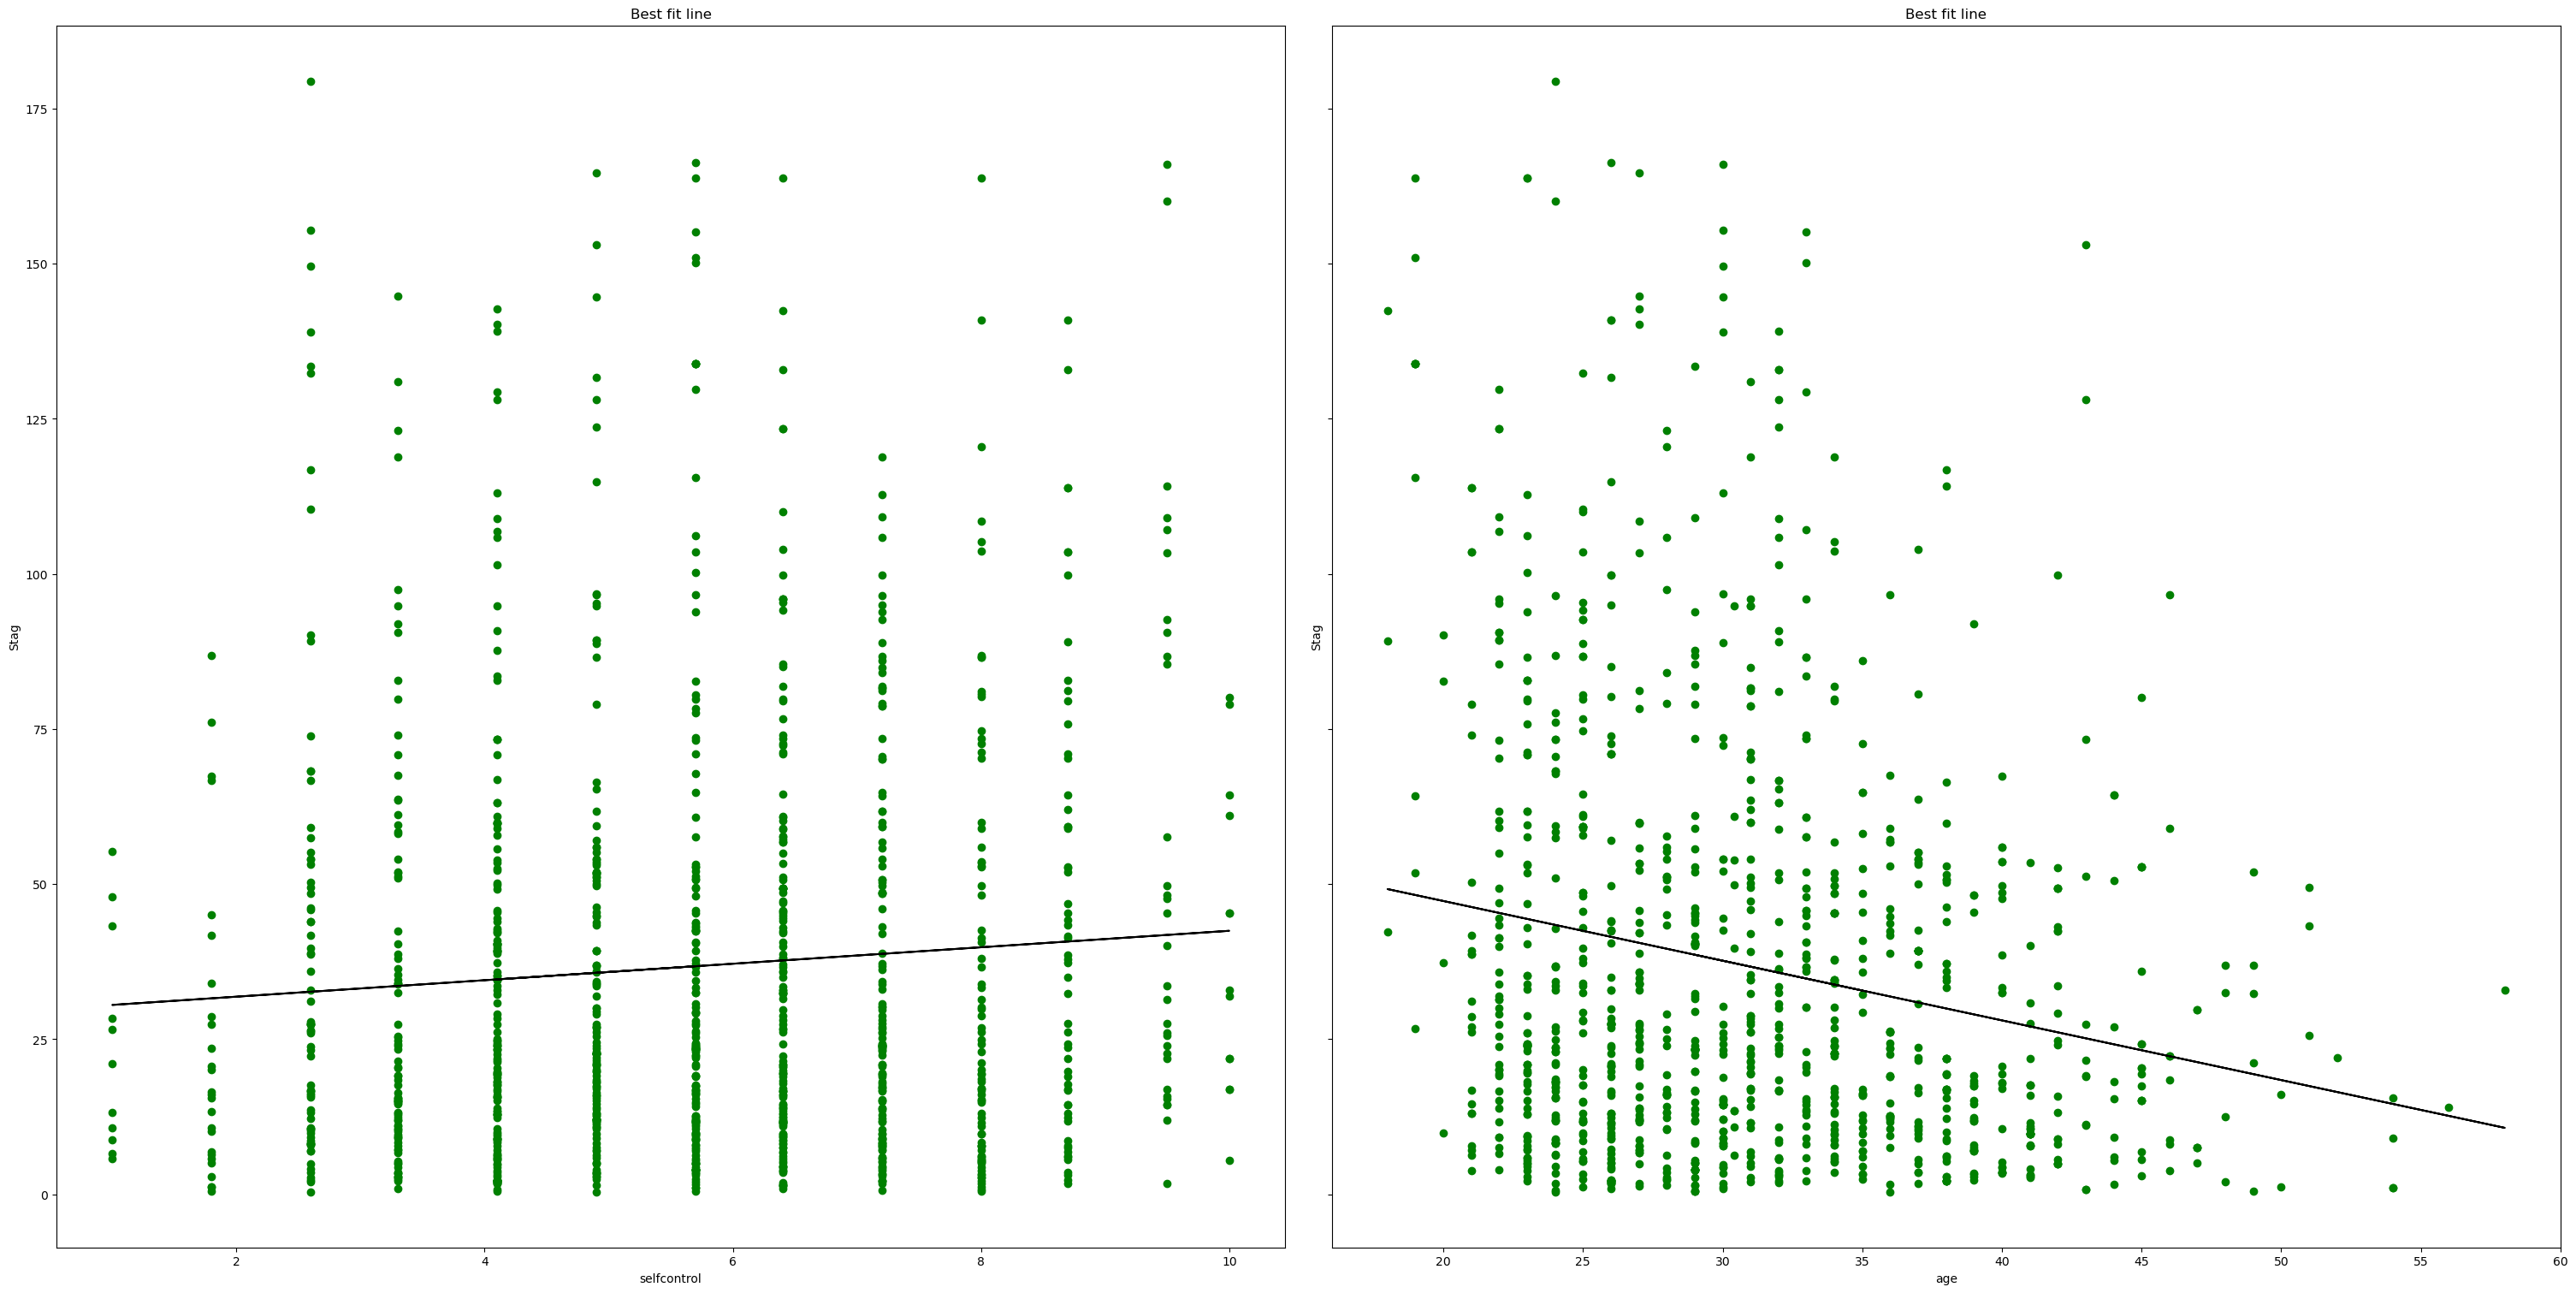

In [8]:
# Plot the linear regression with the 2 independent variables, using example found in
# https://stackoverflow.com/questions/52404857/how-do-i-plot-for-multiple-linear-regression-model-using-matplotlib
# and https://stats.stackexchange.com/questions/73320/how-to-visualize-a-fitted-multiple-regression-model
# in case we are supposed to do a scatterplot
# it takes the first independent variable Self Control and plots against Stag, then plots Age against Stag

x = employee_turnover_dataframe[["selfcontrol", "age"]]
x = pd.get_dummies(x)
x = x.fillna(0)
linear_regr_test = LinearRegression()

fig, axes = plt.subplots(
    1, len(x.columns.values), sharey=True, constrained_layout=True, figsize=(30, 15)
)

for i, e in enumerate(x.columns):
    linear_regr_test.fit(x[e].values[:, np.newaxis], y.values)
    axes[i].set_title("Best fit line")
    axes[i].set_xlabel(str(e))
    axes[i].set_ylabel("Stag")
    axes[i].scatter(x[e].values[:, np.newaxis], y, color="g")
    axes[i].plot(
        x[e].values[:, np.newaxis],
        linear_regr_test.predict(x[e].values[:, np.newaxis]),
        color="k",
    )

<html>
<h2 style="background-color: #022851;">
<font size="+2"><br>
    <font color=#FFBF00><b>&nbsp;  Question #2: Logistic Regression - 20 pts</b></font>
    </font>  <br>
</h2>
</html>

a) Which data set should be used for the logistic regression? Why? (1 sentence)

The Heart Failure Data Set should be used for logistic regression to model Death_Event (a boolean) based on creatinine_phosphokinase, platelets, and time columns.

b) Run the regression and print coefficients & intercept.

In [9]:
# Heart Failure Data Set summary based on https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data/data
# age = age of subject
# anaemia = Decrease of red blood cells or hemoglobin (boolean)
# creatinine_phosphokinase = Level of the CPK enzyme in the blood (mcg/L)
# diabetes = If the patient has diabetes (boolean)
# ejection_fraction = Percentage of blood leaving the heart at each contraction (percentage)
# high_blood_pressure = does subject have high blood pressure?
# platelets = Platelets in the blood (kiloplatelets/mL)
# serum_creatinine = Level of serum creatinine in the blood (mg/dL)
# serum_sodium = Level of serum sodium in the blood (mEq/L)
# sex = sex of subject
# smoking = boolean
# time = Follow-up period (days)
# DEATH_EVENT = If the patient deceased during the follow-up period (boolean)

In [10]:
# Perform a logistic regression against the heart failure dataframe
# model that as the death_event is more likely to happen when with high creatinine_phosphokinase, low platelets, and longer followup time

# define predictor and response variable
df_independentvariables = heart_failure_dataframe[
    ["creatinine_phosphokinase", "platelets", "time"]
]

X = df_independentvariables

y = heart_failure_dataframe["DEATH_EVENT"]

# convert the series to a dataframe and add 'DEATH_EVENT' to the combined dataframe
df = heart_failure_dataframe["DEATH_EVENT"].to_frame(name="DEATH_EVENT")
df = df_independentvariables.assign(DEATH_EVENT=pd.Series(y).values)

# form the matrices with the multiple independent variables vs DEATH_EVENT

y, X = dmatrices(
    "DEATH_EVENT ~ creatinine_phosphokinase + platelets + time",
    df,
    return_type="dataframe",
)
y = np.ravel(y)

# create the model as demonstrated in this week's videos
model = LogisticRegression(C=100000, fit_intercept=False)
model = model.fit(X, y)

print(pd.DataFrame(np.transpose(model.coef_), X.columns))

                                 0
Intercept                -0.000010
creatinine_phosphokinase  0.000243
platelets                 0.000003
time                     -0.016133


Note: Do not worry, we will talk more about the logistic regression's equation and interpretation next week. 